In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Getting to know the data & data cleaning

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Displaying basic information about a data frame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Counting number of distinct elements

df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### Our data has no missing values. 3 columns contain text data, the rest of the columns contain numerical values.

## Exploratory Data Analysis

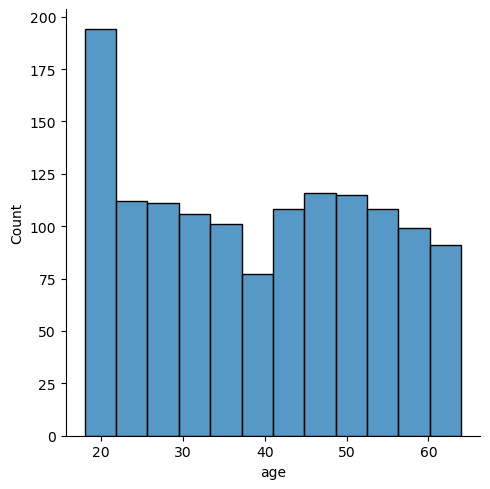

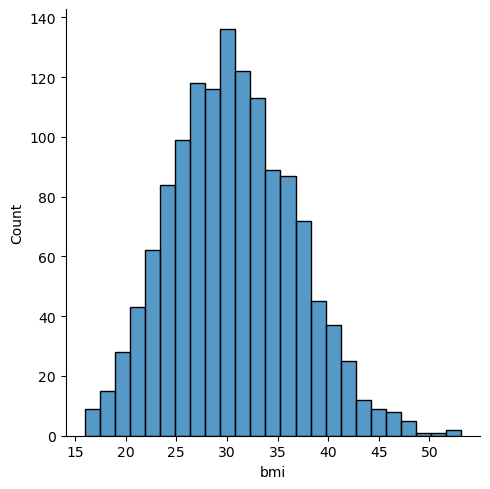

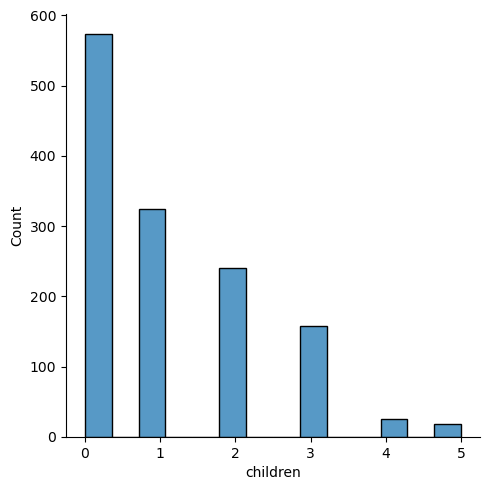

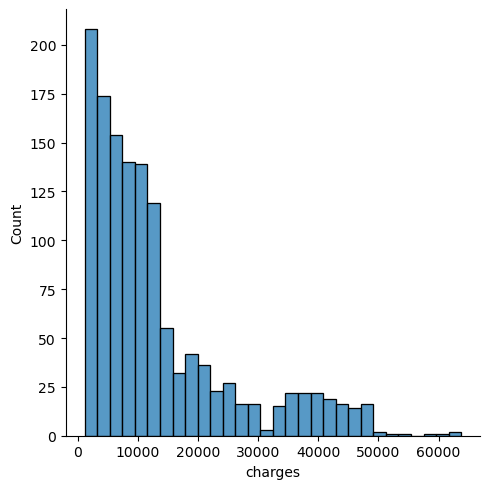

In [6]:
# Checking the distribution of numerical variables

num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for i  in num_columns:
    sns.displot(df[i])
    plt.show();

#### As we can see from the graph above, only the distribution of the BMI column is a normal distribution (normal distribution with negative skewness). The charges distribution is asymmetrical, right-skewed.

In [7]:
#Generating descriptive statistics

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### In the 'charges' column, the highest value (approximately 63770) is significantly higher than 75% of the value (16639). This could be a potential outlier.<br> The BMI has a maximum value of around 53, which can also be considered an outlier, especially when most of the data is centred around a value of around 30. However, because the BMI Index has no upper limit, we will leave these values.<br> To identify outliers more precisely we will use a box plot.

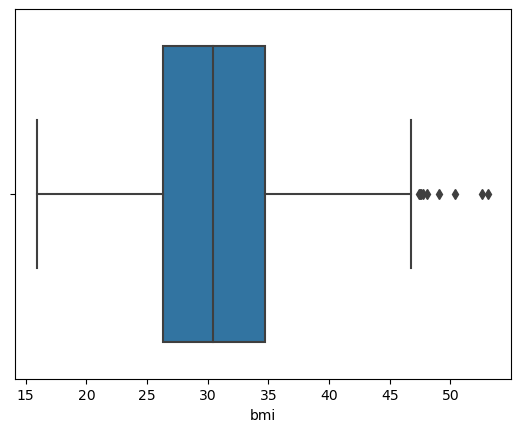

In [8]:
sns.boxplot(data=df, x='bmi');

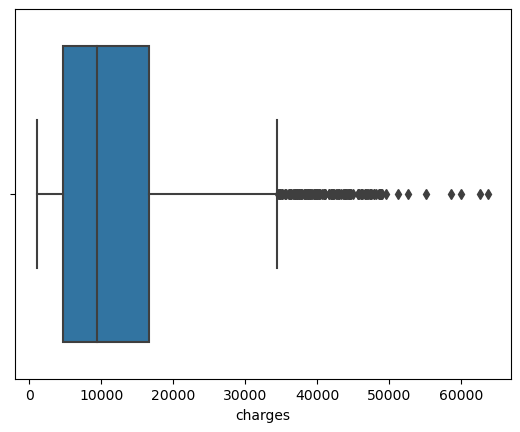

In [9]:
sns.boxplot(data=df, x='charges');

### The outlier values exceed the upper_bound, so we can display as:

In [10]:
def calculate_upper_bound(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

In [11]:
charges_upper_bound = calculate_upper_bound(df, 'charges')

In [12]:
df_charges_upper_bound = df[(df['charges']) > charges_upper_bound]
df_charges_upper_bound.sort_values('charges', ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
1291,19,male,34.900,0,yes,southwest,34828.65400
689,27,male,31.130,1,yes,southeast,34806.46770
223,19,male,34.800,0,yes,southwest,34779.61500
1078,28,male,31.680,0,yes,southeast,34672.14720


In [13]:
#Generating descriptive statistics for outliers

df_charges_upper_bound.describe()

,age,bmi,children,charges
count,139.000000,139.000000,139.000000,139.000000
mean,41.079137,35.564604,1.187050,42103.947206
std,13.801420,4.434917,1.126546,5582.168107
min,18.000000,22.895000,0.000000,34617.840650
25%,30.000000,32.667500,0.000000,37786.149950
50%,43.000000,35.200000,1.000000,40974.164900
75%,52.500000,37.660000,2.000000,45786.706425
max,64.000000,52.580000,4.000000,63770.428010


In [14]:
#Computing pairwise correlation of columns (Due to the presence of outliers, Spearman correlation was used)

df_charges_upper_bound.corr('spearman')

,age,bmi,children,charges
age,1.000000,-0.108013,0.049199,0.700709
bmi,-0.108013,1.000000,0.053093,0.356499
children,0.049199,0.053093,1.000000,0.110245
charges,0.700709,0.356499,0.110245,1.000000


In [15]:
# Correlation plot

def plot_corr_heatmap(dataframe, method='spearman'):
    # Calculating Spearman correlation
    corr = dataframe.corr(method)
    
    # Creating a mask for the lower triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Creating the heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(corr.round(4), mask=mask, annot=True, cmap='magma')
    plt.xticks(rotation=45)
    plt.show()

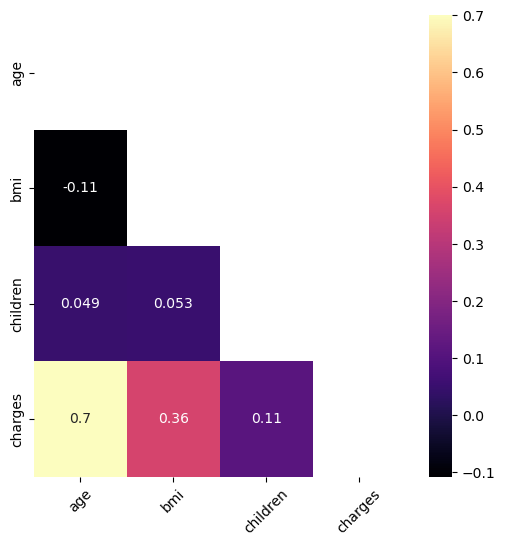

In [16]:
plot_corr_heatmap(df_charges_upper_bound)

#### In the graph above, we can see that the charges score depends on age and bmi. Since there are no outliers in the age column and we have accepted the outliers in the BMI column, we can consider the outliers in the charges column to be correct.<br>Let's see how the correlation looks on the full data

In [17]:
df.corr('spearman')

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


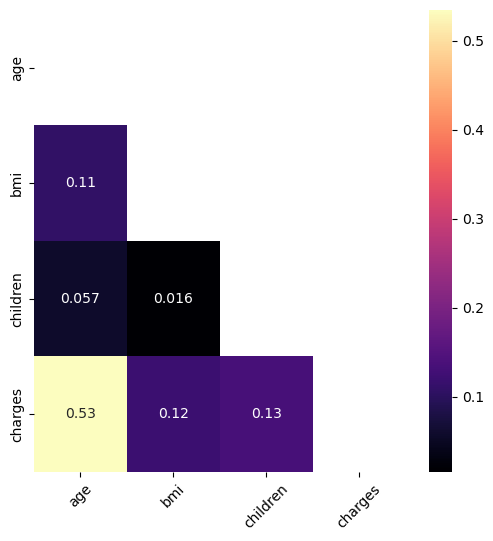

In [18]:
plot_corr_heatmap(df)

#### A correlation of 0.53 suggests a moderate positive relationship between age and insurance costs. For BMI and children versus charges, we see a weaker positive correlation, suggesting that there is some, although not very strong, correlation.

# Data Preprocessing & Feature Engineering

In [19]:
#Converting text values into numerical values

In [20]:
df.select_dtypes(include='object').columns.tolist()

['sex', 'smoker', 'region']

In [21]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [22]:
df['sex'] = df['sex'].map({'male':0, 'female':1})

In [23]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [24]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

In [26]:
df['smoker'].unique()

array([1, 0], dtype=int64)

In [27]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
#For the region column we will use One-Hot Encoding

In [29]:
df_region = pd.get_dummies(df['region'])

In [30]:
df_region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [31]:
#Merging creates a dataframe with the original dataframe

df_processed = pd.concat([df, df_region], axis = 1)

In [32]:
df_processed.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0


In [33]:
#Deleting a region column
df_processed.drop(['region'], axis= 1, inplace=True)

In [34]:
#Sorting of columns

In [35]:
df_processed.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [36]:
new_order = ['age', 'sex', 'bmi', 'children', 'smoker','northeast', 'northwest',
       'southeast', 'southwest', 'charges']

In [37]:
df_processed = df_processed[new_order]

In [38]:
df_processed.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,1,27.900,0,1,0,0,0,1,16884.92400
1,18,0,33.770,1,0,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,0,1,0,4449.46200
3,33,0,22.705,0,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,0,1,0,0,3866.85520


## Exploratory Data Analysis #2

In [39]:
#Calculation of pairwise column correlations for the entire data set

df_processed.corr('spearman')

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
age,1.000000,0.020809,0.107736,0.056992,-0.025210,-0.000149,0.002683,-0.015273,0.013315,0.534392
sex,0.020809,1.000000,-0.044802,-0.015589,-0.076185,0.002425,0.011156,-0.017117,0.004184,-0.009490
bmi,0.107736,-0.044802,1.000000,0.015607,0.002203,-0.133115,-0.127168,0.249037,0.001710,0.119396
children,0.056992,-0.015589,0.015607,1.000000,0.016583,-0.025690,0.034465,-0.019531,0.011466,0.133339
smoker,-0.025210,-0.076185,0.002203,0.016583,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.663460
northeast,-0.000149,0.002425,-0.133115,-0.025690,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.046109
northwest,0.002683,0.011156,-0.127168,0.034465,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.021634
southeast,-0.015273,-0.017117,0.249037,-0.019531,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.017275
southwest,0.013315,0.004184,0.001710,0.011466,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.042354
charges,0.534392,-0.009490,0.119396,0.133339,0.663460,0.046109,-0.021634,0.017275,-0.042354,1.000000


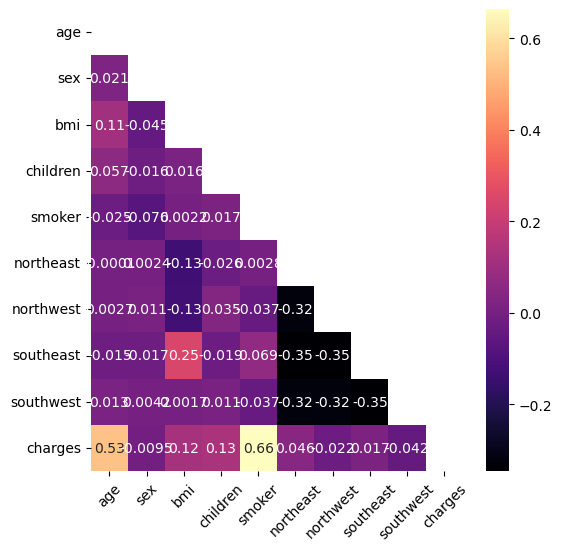

In [40]:
plot_corr_heatmap(df_processed)

#### The highest correlation is between smoking and charges (0.66), indicating a strong positive relationship.

# Linear Regression Model (using: sklearn and statmodels)

## sklearn

In [41]:
# Selecting target and features

X = df_processed.drop(['charges'], axis=1)
y = df_processed['charges']

In [42]:
# Splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [43]:
# Training model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.intercept_

-12409.395986211299

In [45]:
# Calculation of regression coefficients

coeff_df = pd.DataFrame(model.coef_,X.columns, columns=['Coefficient'])
coeff_df.index.name = 'Feature name'
coeff_df = coeff_df.sort_values(coeff_df.columns[0], ascending = False)
coeff_df

,Coefficient
Feature name,
smoker,23651.128856
northeast,459.585244
children,425.278784
bmi,337.092552
age,256.975706
northwest,88.907918
sex,18.591692
southeast,-198.279052
southwest,-350.214110


C:\Users\Przemek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


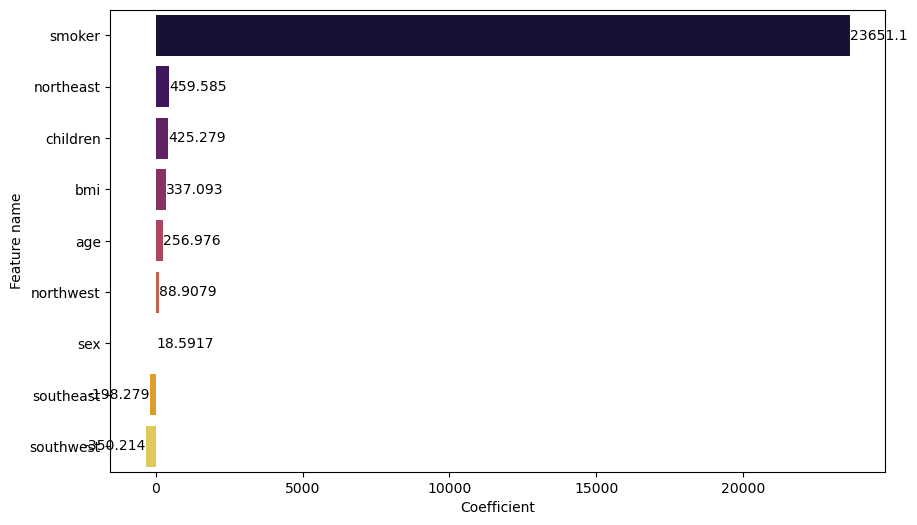

In [46]:
plt.figure(figsize=(10, 6))
ax =sns.barplot(coeff_df['Coefficient'], coeff_df.index, palette="inferno")
ax.bar_label(ax.containers[0],label_type='edge');

In [47]:
# Predicting the target variable

y_pred = model.predict(X_test)

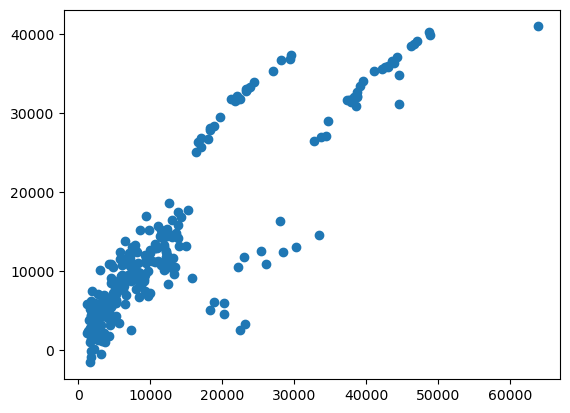

In [48]:
# Visualise the relationship between the actual values of the dependent variable (y_test) and the values predicted by the model (y_pred).

plt.scatter(y_test, y_pred);

#### Our model is not a perfect fit (ideal predictions would lie exactly on a diagonal line (with a 45 degree slope)

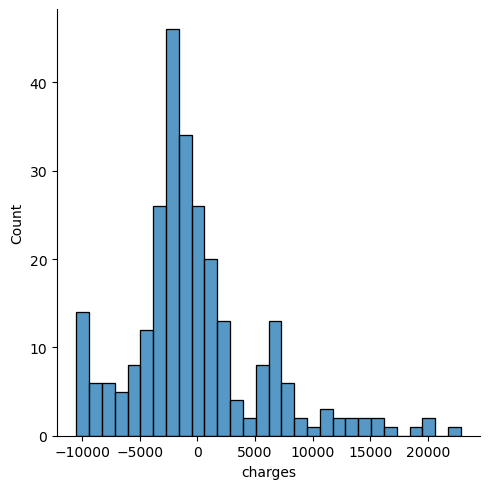

In [49]:
#Visualization of the distribution of errors of the regression model

sns.displot((y_test-y_pred), bins=30)

####  In an ideally fitted model, the distribution of errors should be concentrated around zero. Our distribution is asymmetrical, right-skewed.

In [50]:
# Evaluating the Model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))
print("R-squared (R2):", round(r2, 2))

Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
Mean Absolute Error (MAE): 4181.19
R-squared (R2): 0.78


- Mean Squared Error (MSE) - 33,596,915.85: MSE is a measure of the average of the squares of the errors, that is, the differences between predicted and actual values. The value of 33,596,915.85 is quite high, which may indicate that the model has difficulties in accurately predicting data. The higher the MSE value, the greater the errors of the model.

- Root Mean Squared Error (RMSE) - 5796.28: RMSE is the square root of MSE and is more interpretable because it is in the same units as the variables that the model tries to predict. The value of 5796.28 suggests that the typical error (deviation) between predicted and actual values is relatively large.

- Mean Absolute Error (MAE) - 4181.19: MAE is the average value of the absolute differences between predictions and actual results. MAE 4181.19 also indicates the average error of the model. Since MAE does not square the errors (unlike MSE), it is less sensitive to large errors (so-called outliers).

- R-squared (R2) - 0.78: R2, also known as the coefficient of determination, measures what percentage of the variability of the dependent variable is explained by the model. The value of 0.78 means that about 78% of the variability is explained by your model. This is quite good, but still leaves room for improvement, as 22% of the variability is not explained by the model.

## statmodels

In [51]:
# Training model

model_2 = sm.OLS(y_train, X_train)
results = model_2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          1.32e-305
Time:                        12:25:09   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.9757     13.477     19.067      0.0


# OLS Regression Analysis

## Basic Information

- R-squared: 0.742 - Approximately 74.2% of the variability in the dependent variable is explained by the model. This is a relatively high value, suggesting a good fit of the model to the data.

- Adjusted R-squared: 0.740 - This value takes into account the number of variables in the model and penalizes the addition of variables that do not improve the model significantly. It is very close to the R-squared, indicating that almost all variables are meaningful.

- F-statistic: 380.9 - This is a measure of the overall significance of the model. The value, combined with a very low P-value (1.32e-305), indicates that the model is statistically significant.

## Coefficients

- age: For each year of age, charges increase by an average of 256.98 units.
- sex: Gender has a small and statistically insignificant impact on charges (P>|t| = 0.961).
- bmi: For each BMI point, charges increase by an average of 337.09 units.
- children: Each additional child increases charges by an average of 425.28 units.
- smoker: Being a smoker increases charges by an average of 23,650 units, which is highly significant.
- northeast, northwest, southeast, southwest: All have negative coefficients, suggesting lower charges compared to the baseline region.

## Additional Statistics

- P>|t|: These values indicate the statistical significance of individual coefficients. All variables except sex have very low P-values, indicating their statistical significance.

- Durbin-Watson: 2.085 - This statistic is used to detect the presence of autocorrelation (dependencies between errors in successive observations). A value close to 2 suggests minimal autocorrelation.

- Omnibus, Prob(Omnibus), Jarque-Bera (JB), Prob(JB), Skew, Kurtosis: These tests and statistics relate to the normality of the residuals' distribution. High Omnibus and JB values, along with their close-to-zero P-values, suggest that the residuals are not normally distributed.

- Cond. No.: 612 - This is a measure of multicollinearity. High values may indicate multicollinearity issues.


### *Checking which regression model is best for our data

In [52]:
!pip install lazypredict

In [53]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [54]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:20<00:00,  2.01it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13346.089733


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.88,0.88,4326.36,0.13
RandomForestRegressor,0.86,0.86,4594.23,0.36
LGBMRegressor,0.86,0.86,4601.62,0.32
HistGradientBoostingRegressor,0.86,0.86,4637.54,1.08
BaggingRegressor,0.85,0.85,4804.43,0.06
XGBRegressor,0.85,0.85,4807.76,0.15
ExtraTreesRegressor,0.84,0.84,4907.15,0.28
AdaBoostRegressor,0.82,0.82,5267.06,0.04
KNeighborsRegressor,0.80,0.80,5519.05,0.03
